# 딥 러닝을 이용한 자연어 처리 입문

[구글 코랩에서 실행하기](https://colab.research.google.com/drive/1WQSkfs-BU9ovWMXgFoiJH5Ap7IHV2zth?usp=sharing)

https://wikidocs.net/111472

06-04 자동 미분과 선형 회귀 실습

선형 회귀를 텐서플로우와 케라스를 통해 구현해봅시다.

1. 자동 미분

In [1]:
import tensorflow as tf

tape_gradient()는 자동 미분 기능을 수행

임의로 2w^2 + 5라는 식을세우고 w에 대해 미분

In [2]:
w = tf.Variable(2.)

In [3]:
def f(w):
    y = w**2
    z = 2*y + 5
    return z

gradients를 출력하면 w
에 대해 미분한 값이 저장된 것을 확인

In [5]:
with tf.GradientTape() as tape:
    z = f(w)

gradients = tape.gradient(z, [w])
print(gradients)

[<tf.Tensor: shape=(), dtype=float32, numpy=8.0>]


이 자동 미분 기능을 사용하여 선형 회귀를 구현

2. 자동 미분을 이용한 선형 회귀 구현

우선 가중치 변수 w와 b를 선언\
학습될 값이므로 임의의 값인 4와 1로 초기화

In [6]:
# 학습될 가중치 변수를 선언
w = tf.Variable(4.0)
b = tf.Variable(1.0)

가설을 함수로서 정의

In [7]:
@tf.function
def hypothesis(x):
    return w*x + b

현재의 가설에서 w와 b는 각각 4와 1이므로 임이의 입력값을 넣었을 때의 결과는 다음과 같다.

In [8]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[15. 21. 23. 25.]


다음과 같이 평균 제곱 오차를 손실 함수로서 정의

In [9]:
@tf.function
def mse_loss(y_pred, y):
    #두 개의 차이값을 제곱을 해서 평균을 취한다.
    return tf.reduce_mean(tf.square(y_pred - y))

여기서 사용할 데이터는 x와 y가 약 10배의 차이를 가지는 데이터

In [10]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] #공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] # 각 공부하는 시간에 맵핑되는 성적

옵티마이저는 경사 하강법을 사용하되, 학습률(learning rate)는 0.01을 사용

In [11]:
optimizer = tf.optimizers.SGD(0.01)

약 300번에 걸쳐서 경사 하강법을 수행

In [12]:
for i in range(301):
    with tf.GradientTape() as tape:
        # 현재 파라미터에 기반한 입력 x에 대한 예측값을 y_pred
        y_pred = hypothesis(x)

        # 평균 제곱 오차를 계산
        cost = mse_loss(y_pred, y)

    # 손실 함수에 대한 파라미터의 미분값 계산
    gradients = tape.gradient(cost, [w, b])

    # 파라미터 업데이트
    optimizer.apply_gradients(zip(gradients, [w, b]))

    if i % 10 == 0:
        print("epoch : {:3} | w의 값 : {:5.4f} | b의 값 : {:5.4} | cost : {:5.6f}".format(i, w.numpy(), b.numpy(), cost))

epoch :   0 | w의 값 : 8.2133 | b의 값 : 1.664 | cost : 1402.555542
epoch :  10 | w의 값 : 10.4971 | b의 값 : 1.977 | cost : 1.351182
epoch :  20 | w의 값 : 10.5047 | b의 값 :  1.93 | cost : 1.328165
epoch :  30 | w의 값 : 10.5119 | b의 값 : 1.884 | cost : 1.306967
epoch :  40 | w의 값 : 10.5188 | b의 값 : 1.841 | cost : 1.287436
epoch :  50 | w의 값 : 10.5254 | b의 값 : 1.799 | cost : 1.269459
epoch :  60 | w의 값 : 10.5318 | b의 값 : 1.759 | cost : 1.252898
epoch :  70 | w의 값 : 10.5379 | b의 값 : 1.721 | cost : 1.237644
epoch :  80 | w의 값 : 10.5438 | b의 값 : 1.684 | cost : 1.223598
epoch :  90 | w의 값 : 10.5494 | b의 값 : 1.648 | cost : 1.210658
epoch : 100 | w의 값 : 10.5548 | b의 값 : 1.614 | cost : 1.198740
epoch : 110 | w의 값 : 10.5600 | b의 값 : 1.582 | cost : 1.187767
epoch : 120 | w의 값 : 10.5650 | b의 값 :  1.55 | cost : 1.177665
epoch : 130 | w의 값 : 10.5697 | b의 값 :  1.52 | cost : 1.168354
epoch : 140 | w의 값 : 10.5743 | b의 값 : 1.492 | cost : 1.159782
epoch : 150 | w의 값 : 10.5787 | b의 값 : 1.464 | cost : 1.151890
epoch 

w와 b값이 계속 업데이트 됨에 따라서 cost가 지속적으로 줄어드는 것을 확인할 수 있습니다. 학습된 w와 b의 값에 대해서 임의 입력을 넣었을 경우의 예측값을 확인해봅시다.

In [13]:
x_test = [3.5, 5, 5.5, 6]
print(hypothesis(x_test).numpy())

[38.35479  54.295143 59.608593 64.92204 ]


모델을 구현하는 방법은 한 가지가 아닙니다. 텐서플로우의 경우, 케라스라는 고수준의 API를 사용하면 모델을 이보다 좀 더 쉽게 구현할 수 있습니다. 이번에는 선형 회귀 모델을 케라스로 구현

3. 케라스로 구현하는 선형 회귀

간단하게 케라스를 이용해서 선형 회귀를 구현\
케라스로 모델을 만드는 기본적인 형식은 다음과 같습니다. Sequential로 model이라는 이름의 모델을 만들고, 그리고 add를 통해 입력과 출력 벡터의 차원과 같은 필요한 정보들을 추가

첫번째 인자인 1은 출력의 차원을 정의합니다. 일반적으로 output_dim으로 표현되는 인자입니다. 두번째 인자인 input_dim은 입력의 차원을 정의하는데 이번 실습과 같이 1개의 실수
를 가지고 하는 1개의 실수
를 예측하는 단순 선형 회귀를 구현하는 경우에는 각각 1의 값을 가집니다..

In [15]:
# # 예시 코드. 실행 불가.
# model = Sequential()
# model.add(keras.layers.Dense(1, input_dim=1))

우선 공부한 시간을 x
, 각 공부한 시간에 따른 성적을 y
라고 해봅시다. activation은 어떤 함수를 사용할 것인지를 의미하는데 선형 회귀를 사용할 경우에는 linear라고 기재

옵티마이저로 기본 경사 하강법을 사용하고 싶다면, sgd라고 기재합니다. 학습률은 0.01로 정하였습니다. 손실 함수로는 평균 제곱 오차를 사 용합니다. 그리고 전체 데이터에 대한 훈련 횟수는 300으로 합니다.

In [17]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import optimizers

In [18]:
x = [1, 2, 3, 4, 5, 6, 7, 8, 9] #공부하는 시간
y = [11, 22, 33, 44, 53, 66, 77, 87, 95] #각 공부하는 시간에 맵핑되는 성적

In [19]:
model = Sequential()

In [20]:
# 출력 y의 차원은 1. 입력 x의 차원(input_dim)은 1
# 선형 회귀이므로 activation은 'linear'
model.add(Dense(1, input_dim = 1, activation = 'linear'))

In [23]:
#sgd는 경사 하강법을 의미. 학습률(learning rate, lr)은 0.01.
sgd = optimizers.SGD(learning_rate=0.01)

In [24]:
#손실 함수(Loss function)은 평균제곱오차 mse를 사용.
model.compile(optimizer=sgd, loss='mse', metrics = ['mse'])

In [26]:
# 주어진 x와 y 데이터에 대해서 오차를 최소화하는 작업을 300번 시도.
model.fit(x, y, epochs = 300)

Epoch 1/300
1/1 [==============================] - 1s 1s/step - loss: 4788.2490 - mse: 4788.2490
Epoch 2/300
1/1 [==============================] - 0s 17ms/step - loss: 590.3092 - mse: 590.3092
Epoch 3/300
1/1 [==============================] - 0s 13ms/step - loss: 73.7823 - mse: 73.7823
Epoch 4/300
1/1 [==============================] - 0s 13ms/step - loss: 10.2257 - mse: 10.2257
Epoch 5/300
1/1 [==============================] - 0s 14ms/step - loss: 2.4038 - mse: 2.4038
Epoch 6/300
1/1 [==============================] - 0s 12ms/step - loss: 1.4396 - mse: 1.4396
Epoch 7/300
1/1 [==============================] - 0s 13ms/step - loss: 1.3192 - mse: 1.3192
Epoch 8/300
1/1 [==============================] - 0s 12ms/step - loss: 1.3026 - mse: 1.3026
Epoch 9/300
1/1 [==============================] - 0s 14ms/step - loss: 1.2989 - mse: 1.2989
Epoch 10/300
1/1 [==============================] - 0s 13ms/step - loss: 1.2967 - mse: 1.2967
Epoch 11/300
1/1 [==============================] - 0s 15

학습이 끝났습니다. 최종적으로 선택된 오차를 최소화하는 직선을 그래프로 그려보겠습니다.

1/1 [==============================] - 0s 252ms/step


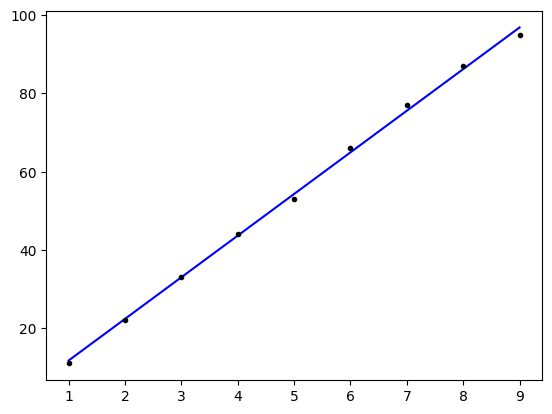

In [27]:
plt.plot(x, model.predict(x), 'b', x, y, 'k.')

위의 그래프에서 각 점은 우리가 실제 주었던 실제값에 해당되며, 직선은 실제값으로부터 오차를 최소화하는 w
와 b
의 값을 가지는 직선입니다. 이 직선을 통해 9시간 30분을 공부하였을 때의 시험 성적을 예측하게 해봅시다. model.predict()은 학습이 완료된 모델이 입력된 데이터에 대해서 어떤 값을 예측하는지를 보여줍니다.

In [30]:
print(model.predict([9.5]))

1/1 [==============================] - 0s 39ms/step
[[102.134026]]


9시간 30분을 공부하면 약 102.1점을 얻는다고 예측